# Support Vector Machines

Most often used to solve classification problems but can also be used for regression. They technically perform binary classification only but with scikit-learn they can also do multiclass classification.

## How Support Vector Machines Work

SVMs find a decision boundary that cleanly separates classes by finding a line in 2D space, a plane in 3D space, or a hyperplane in higher-dimensional space that allows them to distinguish between different classes.

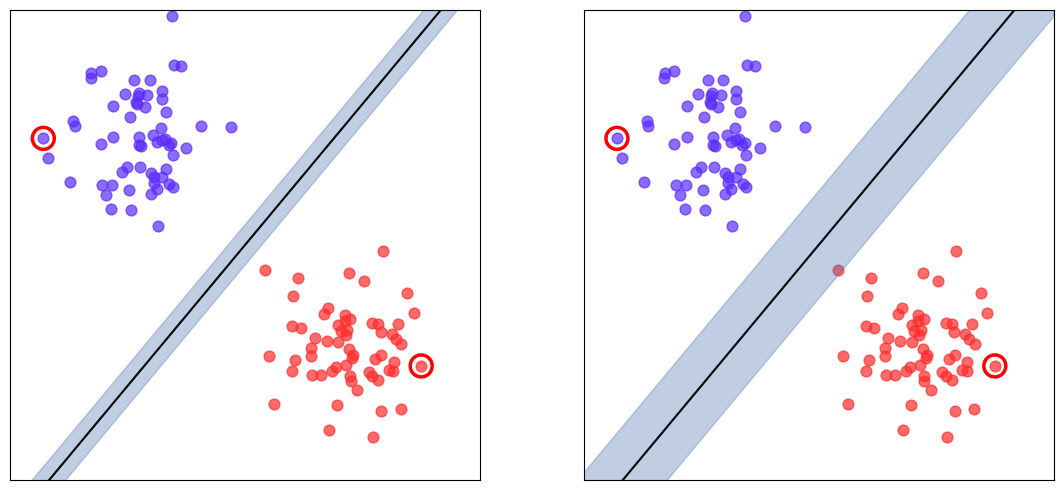

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23)
n = 60

purple = np.random.randn(n, 2) * 0.6 + np.array([-1.5, 1.5])
red = np.random.randn(n,2) * 0.6 + np.array([1.5,-1.5])

circ_purple = purple[np.argmin(purple[:,0])]
circ_red = red[np.argmax(red[:,0])]

x = np.linspace(-3.5, 3.5, 200)
slope = 1.2
intercept = 0.0
y = slope * x + intercept

margin_narrow = 0.3
margin_wide = 0.8

def plot_panel(ax, margin):
    ax.scatter(purple[:,0], purple[:,1], color='#5b2cff', s=60, alpha=0.7)
    ax.scatter(red[:,0], red[:,1], color='#ff2d2d', s=60, alpha=0.7)

    ax.plot(x, y, color="black", linewidth=1.5)
    ax.fill_between(x, slope * x + intercept - margin, slope * x + intercept + margin, color='#4c72b0', alpha=0.35)
    ax.scatter([circ_purple[0], circ_red[0]],[circ_purple[1], circ_red[1]], facecolors="none", edgecolors="red", s=250, linewidths=2.5)

    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_panel(axes[0], margin_narrow)
plot_panel(axes[1], margin_wide)

plt.tight_layout()
plt.show()

SVMs support a regularization parameter usually reffered to as C that can be adjusted to loosen or tighten the fit. Lower values of C produce a wider margin with more errors on either side of the decision boundary, while higher values yield a tighter fit to the training data with a correspondingly thinner margin and fewer errrors. The optimal value of C varies by dataset.

What makes SVMs special are kernels, some of which add dimensions to data to find boundaries that don't exist at lower dimensions. For example in some cases you can't draw a line that separates the two classes but if you add a third dimension whose value is based on a point's distance from the center then you can slide a plane between the two classes. THe principle at work is Cover's theorem which states that the data that isn't linearly separable might be linearly separable if projected into higher-dimensional space using a nonlinear transformation.

## Kernels

There are several general-purpose kernels:

1. Linear kernel - doesn't add dimensions, it works well with data that is linearly separable.
2. RBF kernel - projects the x and y values into a gihter-dimensional space and fins a hyperplane that cleanly separates the purple from the red dots.

The RBF kernel didn't add a z to every x and y, it effectively projected the data points into a space with an infinite number of dimensions. Kernels use mathematical shortcuts called kernel tricks to measrue the effect of adding new dimensions without actually computing values for them. Kernels are carefully designed to compute the dot product between two n-dimensional vector in m-dimensional space (where m is greater than n and can even be infinite) without generating all those new dimensions and ultimately the dot products are all an SVM needs to compute a decision boundary.

## Hyperparameter Tuning

It is diffucult to know which of the built-in kernels will produce the most accurate model. It is also difficult to know the right value of C. For the RBF and polynomial kernels there's a third value called gamma that affects accuracy. And for polynomial kernels the degree parameter impacts the model's ability to learn from the tarining data. For RBF kernels the right value for gamma is important too. Gamma controls how far the influence of a single data point reaches in computing decision boundaries. Lower values use more points and produce smoother decision boundaries, higher values involve fewer points and fit more tightly to the training data. Gamma can be any nonzero positive value but values between 0 and 1 are the most common. Finding the combination of parameters that produces the most accurate model is a process called hyperparameter tuning. Grid Search is a process which tries all combinations of a specified set of parameter values with built-in cross-validation to determine which combination produces the most accurate model.

## Data Normalization

There are several classes for normalizing data. The most commonly used are:

1. MinMaxScalar - normalizes data by proportionally reducing the values in each column to values from 0.0 to 1.0. For each column in the dataset subtract the minimum value in that column from all the column's values then divide each value by the difference between the minimum and maximum values.
2. Standardization - normalizes the data to unit variance. First computers the man and standard deviations of all the values in the column, then subtracts the man from each value in the column and then divides teach value in the column by the standard deviation. The transfromed dataset will contain columns of numbers anchored around 0 with ranges that are proportional to each columns standard deviation.

## Pipelining

If the data is normalized or standardized before training the model the same transformation has to be applied to the input data before the prediction is made. To make it harder to forget to do this we use pipelines. 

## Using SVMs for facial Recognition

In [3]:
import pandas as pd
from sklearn.datasets import fetch_lfw_people 

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.Images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 125, 125)


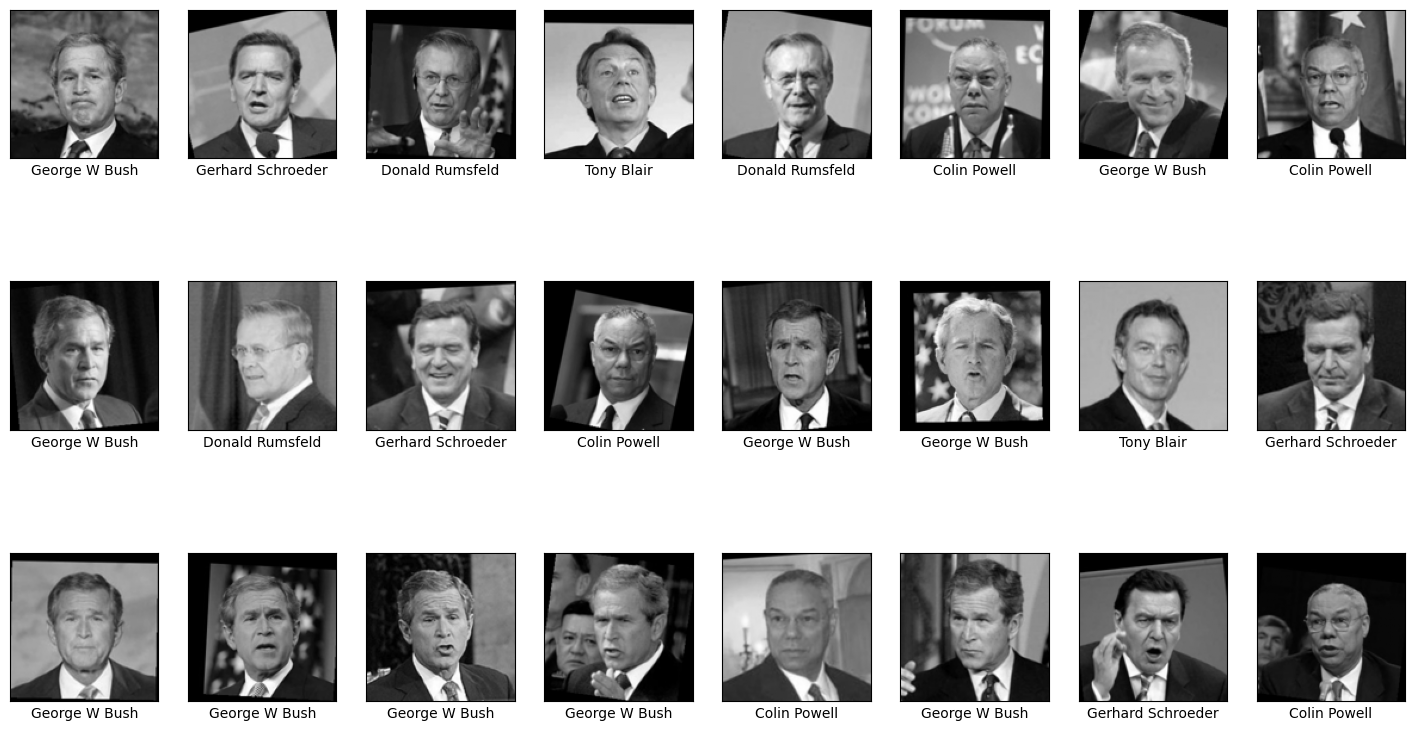

In [4]:
fig, ax = plt.subplots(3, 8, figsize=(18,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

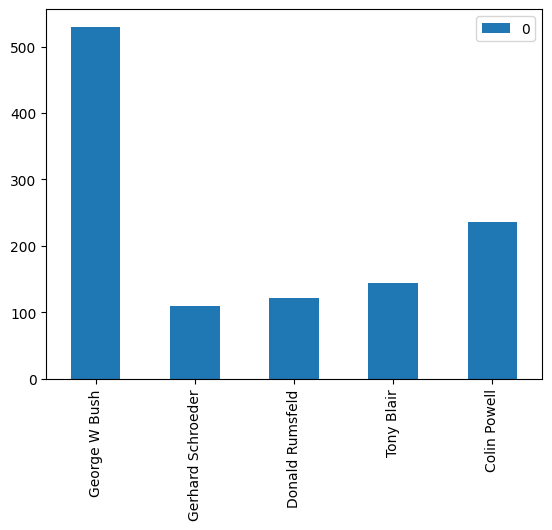

In [6]:
from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [8]:
mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x = faces.data[mask]
y = faces.target[mask]
x.shape

(500, 15625)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='linear')

grid = {
    'C': [0.1,1,10,100]
}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   2.9s
[CV] END ..............................................C=0.1; total time=   3.6s
[CV] END ..............................................C=0.1; total time=   3.0s
[CV] END ..............................................C=0.1; total time=   2.8s
[CV] END ..............................................C=0.1; total time=   2.7s
[CV] END ................................................C=1; total time=   2.7s
[CV] END ................................................C=1; total time=   2.7s
[CV] END ................................................C=1; total time=   2.8s
[CV] END ................................................C=1; total time=   2.8s
[CV] END ................................................C=1; total time=   2.8s
[CV] END ...............................................C=10; total time=   2.7s
[CV] END ........................................

np.float64(0.734)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1,1,10,100]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=  10.6s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END .........................................svc__C=0.1; total time=   4.1s
[CV] END .........................................svc__C=0.1; total time=   4.0s
[CV] END ...........................................svc__C=1; total time=   5.3s
[CV] END ...........................................svc__C=1; total time=   4.1s
[CV] END ...........................................svc__C=1; total time=   4.8s
[CV] END ...........................................svc__C=1; total time=   3.8s
[CV] END ...........................................svc__C=1; total time=   2.9s
[CV] END ..........................................svc__C=10; total time=   4.1s
[CV] END ........................................

np.float64(0.8140000000000001)

In [12]:
grid_search.best_params_

{'svc__C': 0.1}

In [13]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1,1,10,100],
    'svc__gamma': [0.01,0.25,0.5,0.75,1],
    'svc__degree': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   2.7s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   2.8s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   2.7s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   2.8s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   3.4s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   2.9s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   2.7s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   2.9s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   2.8s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   2.9s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   2.7s
[CV] END ..........svc__C=0.1, svc__degree=1, 

np.float64(0.8140000000000001)

In [14]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.01}

In [16]:
scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler,svc)

grid = {
    'svc__C': [0.1,1,10,100],
    'svc__gamma': [0.01,0.25,0.5,0.75,1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   3.8s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   4.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   3.7s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   3.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   3.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   3.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   3.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   3.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   3.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   3.5s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   3.5s
[CV] END .........................svc__C=0.1, s

np.float64(0.418)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

In [19]:
scaler = StandardScaler()
svc = SVC(kernel='linear', C=0.1)
pipe = make_pipeline(scaler,svc)
pipe.fit(x_train,y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'


In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, x, y, cv=5).mean()

np.float64(0.8140000000000001)

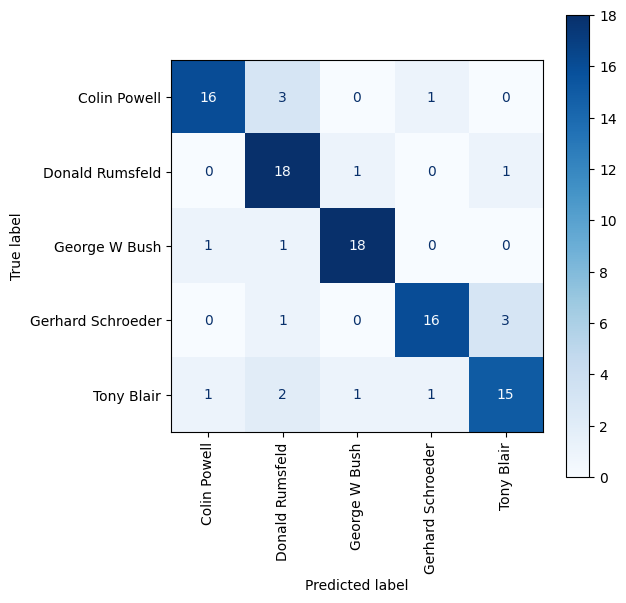

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names, cmap='Blues', xticks_rotation='vertical', ax=ax)